# Decison Trees

Dataset taken from Kaggle. Car purchase data.

In [32]:
import numpy as np
import pandas as pd
from sklearn import tree
import io

from google.colab import files
uploaded = files.upload()
car_df = pd.read_csv(io.BytesIO(uploaded['car_data.csv']), header = 0)

Saving car_data.csv to car_data (1).csv


In [33]:
car_df.head(5)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


scikit-learn needs everything to be numerical for decision trees to work. So, we'll map Y,N to 1,0 and levels of education to some scale of 0-2. In the real world, you'd need to think about how to deal with unexpected or missing data! By using map(), we know we'll get NaN for unexpected values.

In [34]:
gender = {'Male': 1, 'Female': 0}
car_df['Gender'] = car_df['Gender'].map(gender)

car_df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0


Next we need to separate the features from the target column that we're trying to bulid a decision tree for.

In [57]:
features = list(car_df.columns[1:4])
features

['Gender', 'Age', 'AnnualSalary']

Now actually construct the decision tree:

In [58]:
y = car_df["Purchased"]
X = car_df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

... and display it. Note you need to have pyplot2 installed for this to work.

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "no hires" and 5 "hires" by the tim we get to that point. value = [3. 0.] means 3 no-hires and 0 hires.

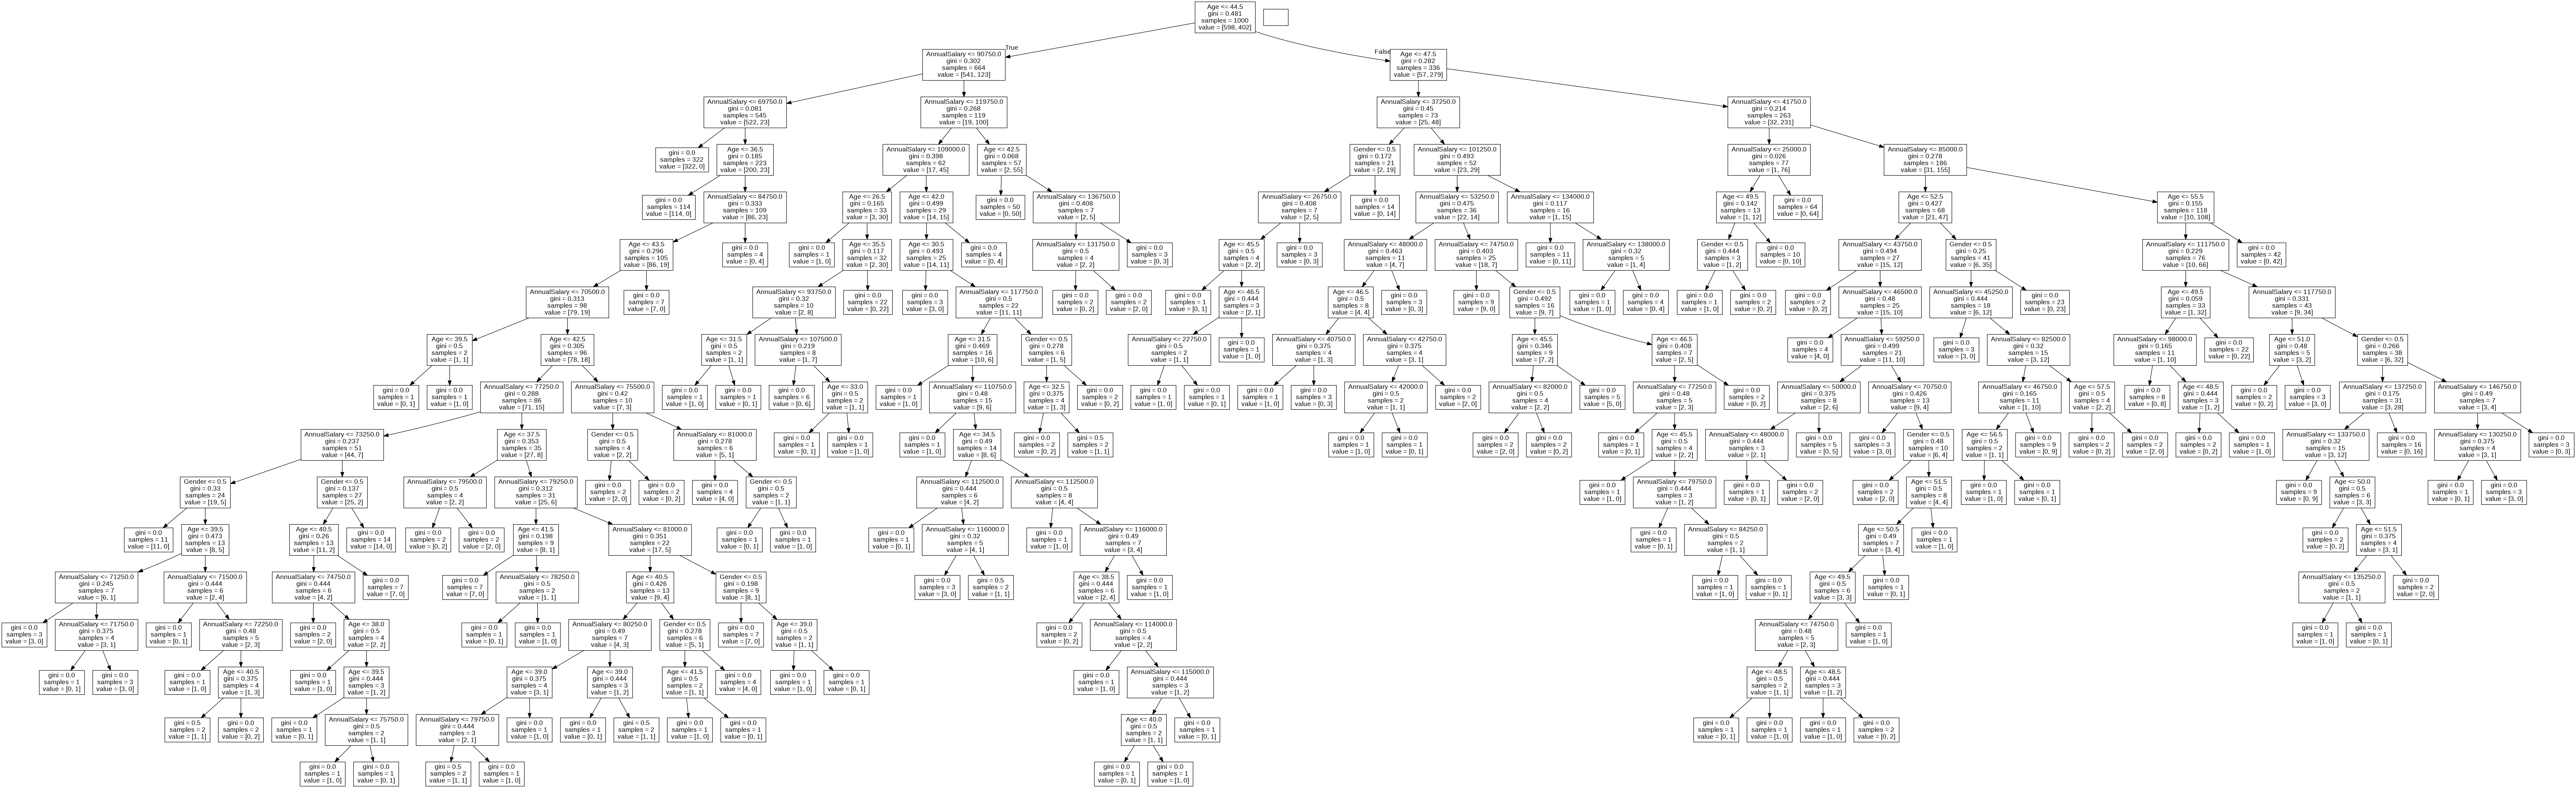

In [61]:
from IPython.display import Image  
from six import StringIO
import pydot

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())  

## Ensemble learning: using a random forest

We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:

In [83]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)
clf = clf.fit(X, y)
print(clf.predict([[1, 35, 70000]]))
print(clf.predict([[1, 40, 107500]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


[0]
[1]


## Activity

Modify the test data to create an alternate universe where everyone I hire everyone I normally wouldn't have, and vice versa. Compare the resulting decision tree to the one from the original data.